# Background: 
In 2006, global concern was raised over the rapid decline in the honeybee population, an integral component of American honey agriculture. Large numbers of hives were lost to Colony Collapse Disorder, a phenomenon of disappearing worker bees causing the remaining hive colony to collapse. Speculation to the cause of this disorder points to hive diseases and pesticides harming the pollinators, though no overall consensus has been reached. The U.S. used to locally produce over half the honey it consumes per year. Now, honey mostly comes from overseas, with 350 of the 400 million pounds of honey consumed every year originating from imports. This dataset provides insight into honey production supply and demand in America from 1998 to 2016.

# Objective: 
To visualise how honey production is changed over the years (1998-2016) in the United States. 

# Key questions to be answered:

* How has honey production yield changed from 1998 to 2016?
* Over time, what are the major production trends been across the states?
* Are there any patterns that can be observed between total honey production and value of production every year? How has value of production, which in some sense could be tied to demand, changed every year?

# Dataset:

* state: Various states of U.S.
* numcol: Number of honey-producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies that did not survive the entire year
* yieldpercol: Honey yield per colony. Unit is pounds
* totalprod: Total production (numcol x yieldpercol). Unit is pounds
* stocks: Refers to stocks held by producers. Unit is pounds
* priceperlb: Refers to average price per pound based on expanded sales. The unit is dollars.
* prodvalue: Value of production (totalprod x priceperlb). The unit is dollars.
* year: Year of production

### Import the necessary packages - pandas, numpy, seaborn, matplotlib.pyplot

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
pd.set_option('display.float_format', lambda x: '%.5f' % x) # To supress numerical display in scientific notations

### Read in the dataset

In [96]:
honeyprod = pd.read_csv(filepath_or_buffer='honeyproduction1998-2016.csv', sep=',', header=0,
                       dtype={'state': 'category', 'numcol': 'int64', 'yieldpercol': 'int64',
                              'totalprod': 'int64', 'stocks': 'int64', 'priceperlb': 'float64',
                              'prodvalue': 'int64', 'year': 'category'})
honeyprod.dtypes

state          category
numcol            int64
yieldpercol       int64
totalprod         int64
stocks            int64
priceperlb      float64
prodvalue         int64
year           category
dtype: object

### View the first few rows of the dataset

In [102]:
first_10_results = honeyprod.head(10)
honeyprod['prodvalue'].head(10)

0      818000
1     2112000
2     2033000
3    23157000
4     1361000
5    14426000
6     2898000
7      727000
8     3900000
9      760000
Name: prodvalue, dtype: int64

In [109]:
# How is prodvalue calculated?
honeyprod['calculation'] = honeyprod['totalprod'] * honeyprod['priceperlb']
honeyprod['diff'] = honeyprod['prodvalue'] - honeyprod['calculation']
honeyprod['efficiency'] = honeyprod['stocks'] / honeyprod['totalprod']


honeyprod = honeyprod.drop(['calculation', 'diff'], axis=1)
honeyprod.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,efficiency
0,Alabama,16000,71,1136000,159000,0.72000,818000,1998,0.13996
1,Arizona,55000,60,3300000,1485000,0.64000,2112000,1998,0.45000
2,Arkansas,53000,65,3445000,1688000,0.59000,2033000,1998,0.48999
3,California,450000,83,37350000,12326000,0.62000,23157000,1998,0.33001
4,Colorado,27000,72,1944000,1594000,0.70000,1361000,1998,0.81996


Observations: The dataset looks clean and consistent with the description provided in the Data Dictionary.

### Check the shape of the dataset

In [110]:
honeyprod.shape

(785, 9)

Observations: We have 785 observations of 8 columns

### Check the datatype of the variables to make sure that the data is read in properly

In [111]:
honeyprod.dtypes

state          category
numcol            int64
yieldpercol       int64
totalprod         int64
stocks            int64
priceperlb      float64
prodvalue         int64
year           category
efficiency      float64
dtype: object

Observations: 
1. state is object data type
2. year is integer type currently. Since year is a categorical variable here, let us convert it to category data data type in Python. 
2. All the other variables are numerical and there for their python data types (float64 and int64) are ok.

In [14]:
honeyprod['year'] = honeyprod['year'].astype('category') # To convert year into categories
# Uncomment the following code to learn more about the astype function and its attribtes
# help(honeyprod.astype)

# Also will convert state to category because that makes sense
honeyprod['state'] = honeyprod['state'].astype('category')

In [15]:
honeyprod.dtypes

state          category
numcol          float64
yieldpercol       int64
totalprod       float64
stocks          float64
priceperlb      float64
prodvalue       float64
year           category
dtype: object

### Let us analyse the quantitative variables in the dataset

In [112]:
honeyprod.describe()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,efficiency
count,785.00000,785.00000,785.00000,785.00000,785.00000,785.00000,785.00000
mean,61686.62420,60.57834,4140956.68790,1257629.29936,1.69516,5489738.85350,0.31324
std,92748.94046,19.42783,6884593.85877,2211793.81706,0.93062,9425393.87822,0.17235
min,2000.00000,19.00000,84000.00000,8000.00000,0.49000,162000.00000,0.01978
25%,9000.00000,46.00000,470000.00000,119000.00000,1.05000,901000.00000,0.18085
50%,26000.00000,58.00000,1500000.00000,391000.00000,1.48000,2112000.00000,0.28889
75%,65000.00000,72.00000,4096000.00000,1380000.00000,2.04000,5559000.00000,0.41039
max,510000.00000,136.00000,46410000.00000,13800000.00000,7.09000,83859000.00000,1.12008


Observations:
1. Number of colonies in every state are spread over a huge range. Ranging from 2000 to 510000.
2. The mean numcol is close to the 75% percentile of the data, indicating a right skew.
3. As expected, standard deviation of numcol is very high
4. yieldpercol - Yield per colony also has huge spread ranging from 19 pounds to 136 pounds.
5. Infact, all the variable seem to have a huge range, we will have to investigate furthur if this spread is mainly across different states or varies in the same state over the years. 

#### Looking at the relationship between numerical variables using pair plots and correlation plots

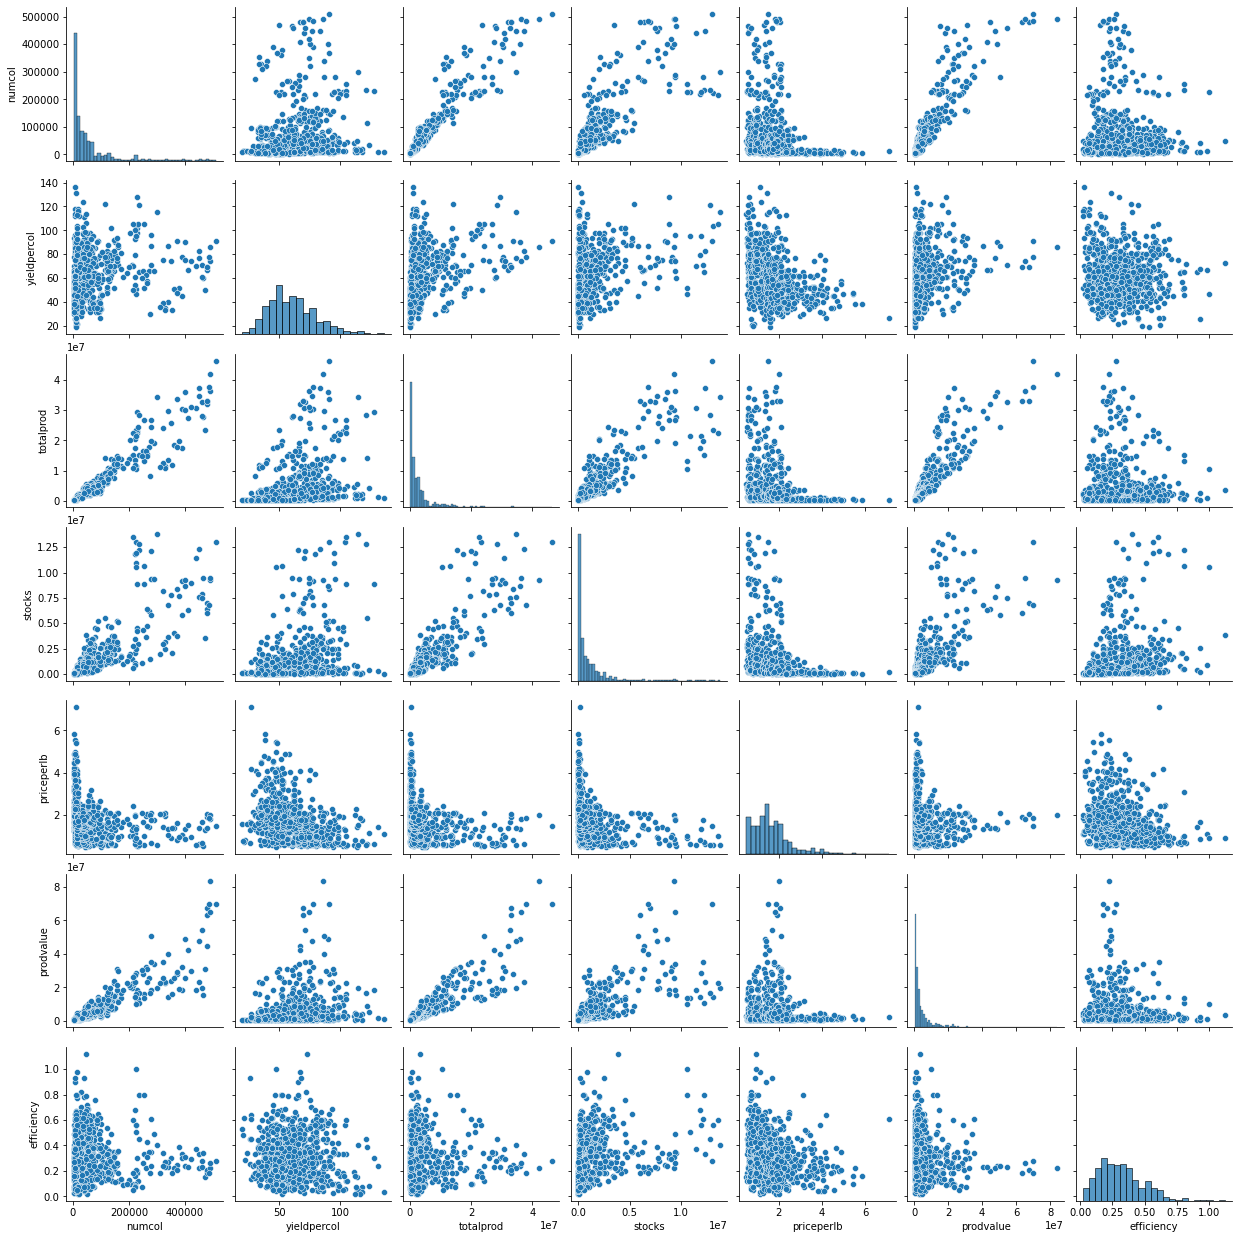

In [113]:
sns.pairplot(honeyprod)

In [114]:
correlation = honeyprod.corr() # creating a 2-D Matrix with correlation plots
correlation

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,efficiency
numcol,1.00000,0.22454,0.95182,0.82008,-0.21143,0.89899,-0.03383
yieldpercol,0.22454,1.00000,0.38295,0.35868,-0.36057,0.25579,-0.05204
totalprod,0.95182,0.38295,1.00000,0.87687,-0.23909,0.89524,-0.03333
stocks,0.82008,0.35868,0.87687,1.00000,-0.27593,0.71316,0.25227
priceperlb,-0.21143,-0.36057,-0.23909,-0.27593,1.00000,-0.06183,-0.25836
prodvalue,0.89899,0.25579,0.89524,0.71316,-0.06183,1.00000,-0.09552
efficiency,-0.03383,-0.05204,-0.03333,0.25227,-0.25836,-0.09552,1.00000


<AxesSubplot:>

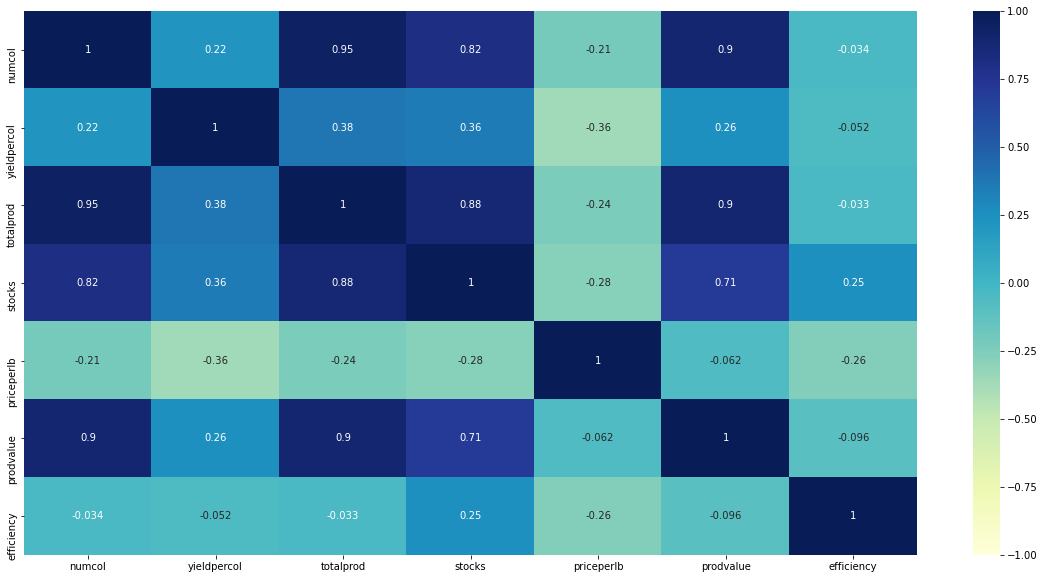

In [116]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(correlation, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)

In [23]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 

<AxesSubplot:>

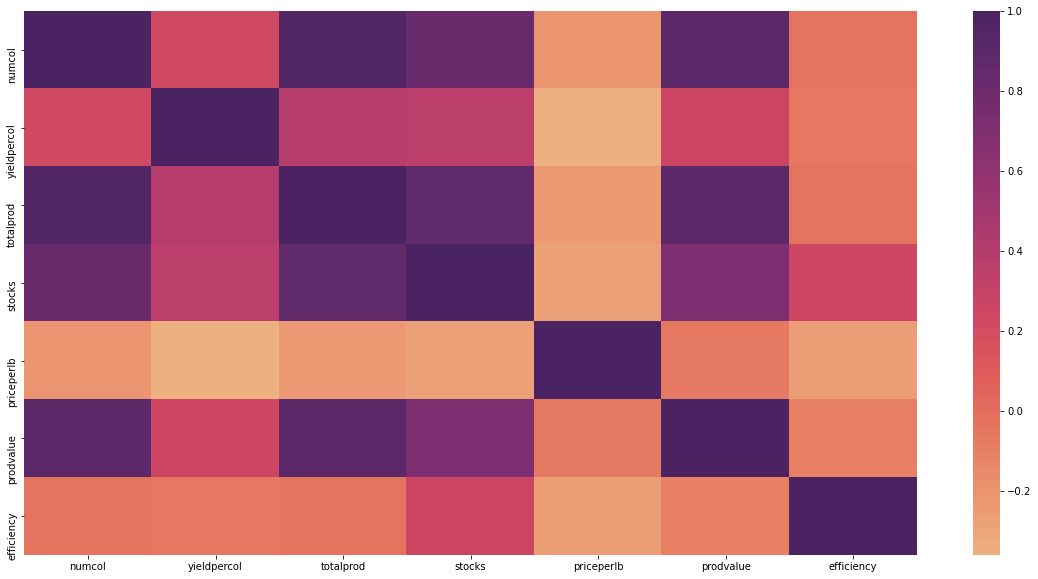

In [117]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.heatmap(correlation, annot=False, cmap='flare')

Observations:
1. Number of colonies have a high positive correlation with total production, stocks and the value of production. As expected, all these values are highly correlated with each other.
2. Yield per colony does not have a high correlation with any of the features that we have in our dataset. 
3. Same is the case with priceperlb.
4. Determining the factors influencing per colony yield and price per pound of honey would need furthur investigation.  

### Let us now explore the categorical features - state and year

In [26]:
print(honeyprod.state.nunique())
print(honeyprod.year.nunique())

44
19


We have honey production data for 44 US states over a span of 19 years, from 1998 to 2016.

### Let us look at the overall trend of honey production in the US over the years

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

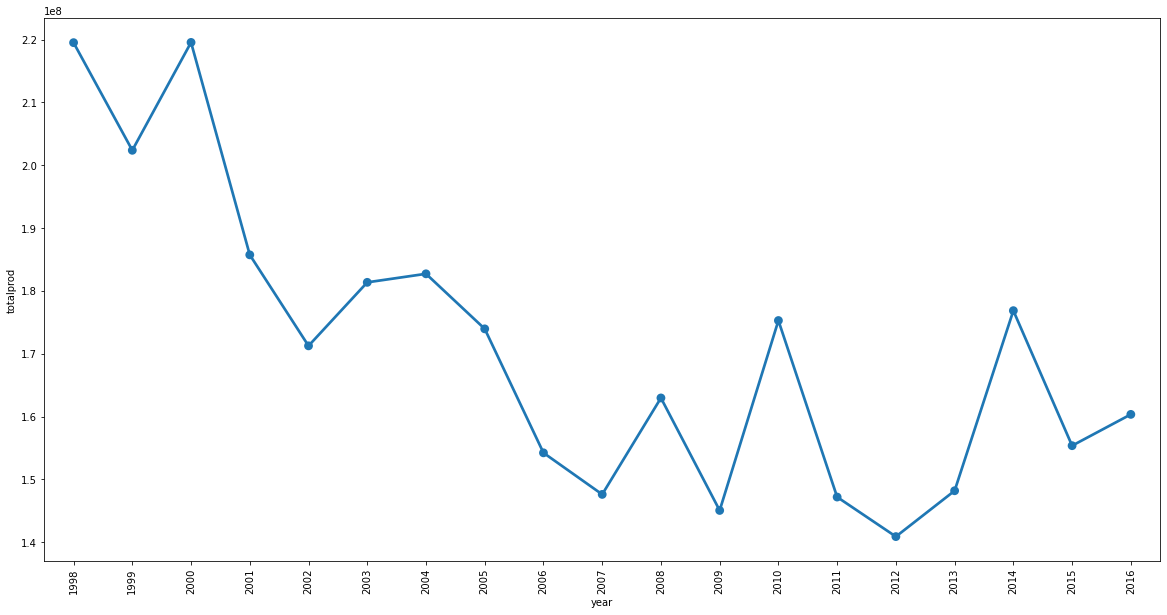

In [118]:
plt.figure(figsize = (20,10)) # To resize the plot

sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

# Uncomment the following code to check the actual values
# honeyprod.groupby(['year'])['totalprod'].sum().reset_index()

Observations: 
1. The overall honey production in the US has been decresing over the years.
2. Total honey production = number of colonies * average yield per colony. Let us check if the honey production is decreasing due to one of these factors or both.

### Variation in the number of colonies over the years 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

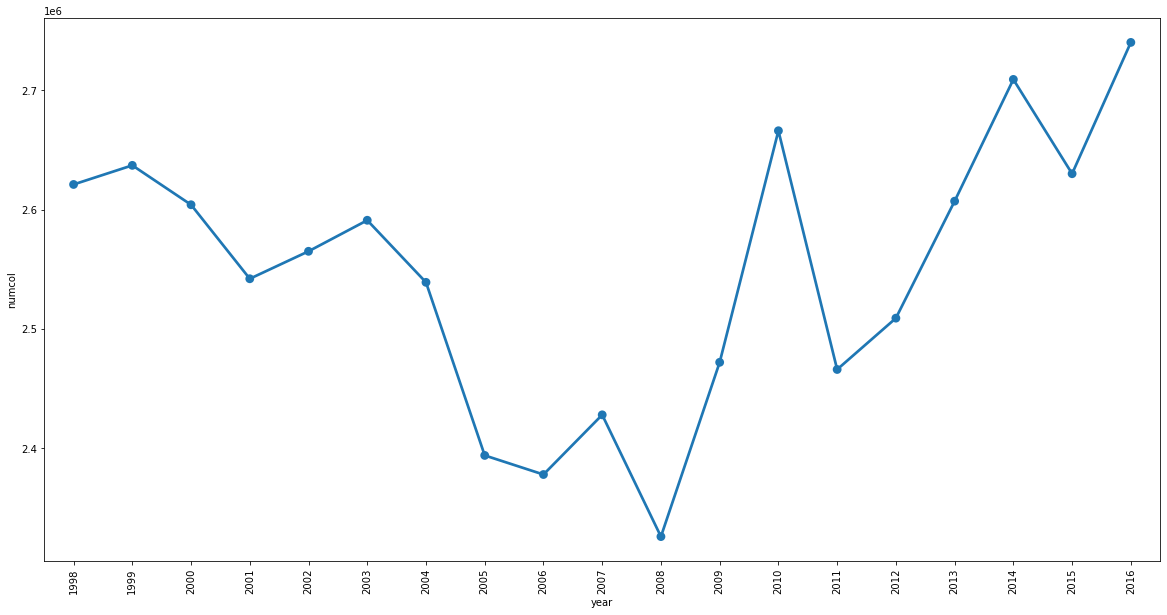

In [119]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.pointplot(x='year', y='numcol', data=honeyprod, ci=None, estimator=sum)
plt.xticks(rotation=90) # To rotate the x axis labls

Observations: 
1. The number of colonies across the country shows a declining trend from 1998-2008 but has seen an uptick since 2008.
2. It is possible that there was some intervension in 2008 that help in increasing the number of honey bee colonies across the country.

### Variation of yield per colony over the years 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

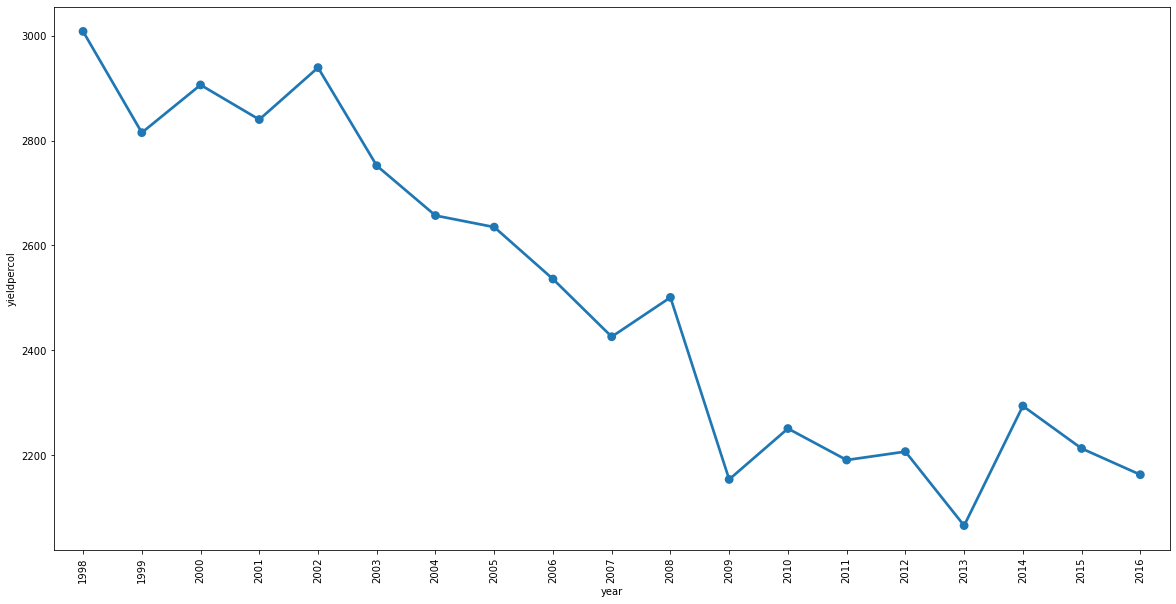

In [120]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.pointplot(x='year', y='yieldpercol', data=honeyprod, estimator=sum, ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

Onservation: 
1. In contrast to number of colonies, the yield per colony has been decreasing since 1998.
2. This indicates that, it is not the number of colonies that is causing a decline in totalhoney production but the yield per colony.

### Let us look at the production trend at state level

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

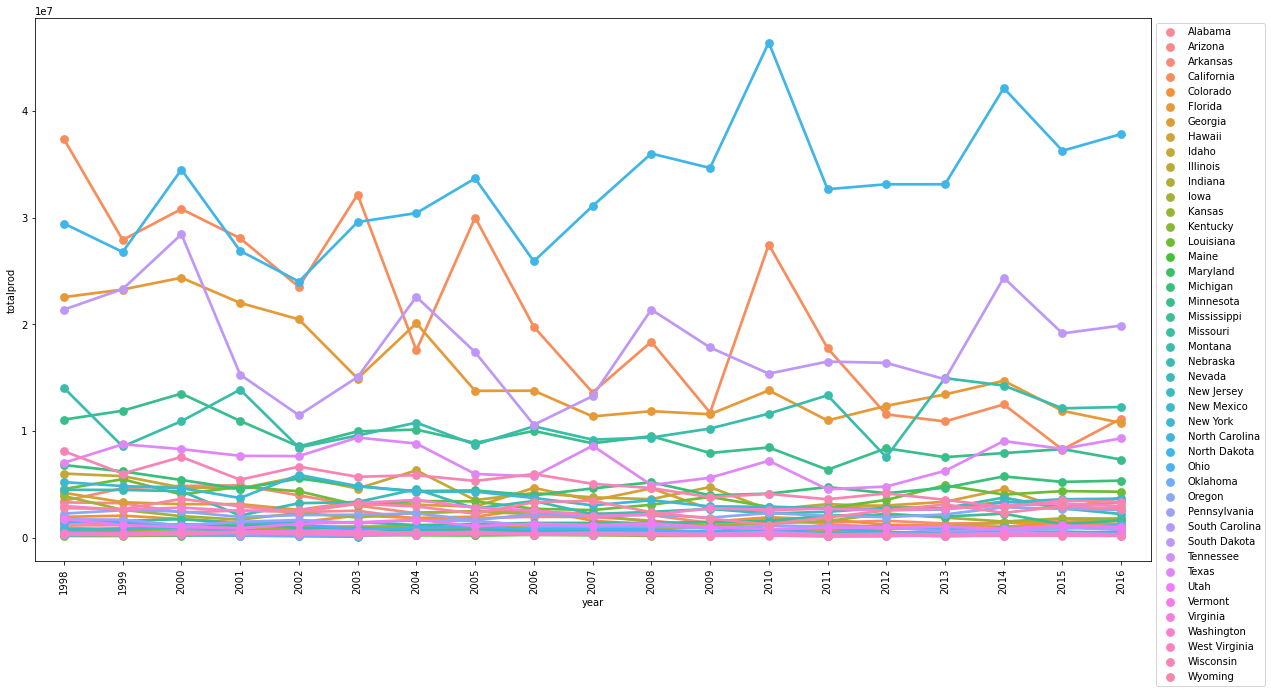

In [38]:
# Add hue parameter to the pointplot to plot for each state
plt.figure(figsize = (20,10)) # To resize the plot
sns.pointplot(x='year', y='totalprod', data=honeyprod, estimator=sum, ci=None, hue = 'state')
plt.legend(bbox_to_anchor=(1, 1))
plt.xticks(rotation=90) # To rotate the x axis labls

Observations: There are some states that have much higher productions than the others but this plot is a little hard to read. Let us try plotting each state seperatly for a better understanding. 

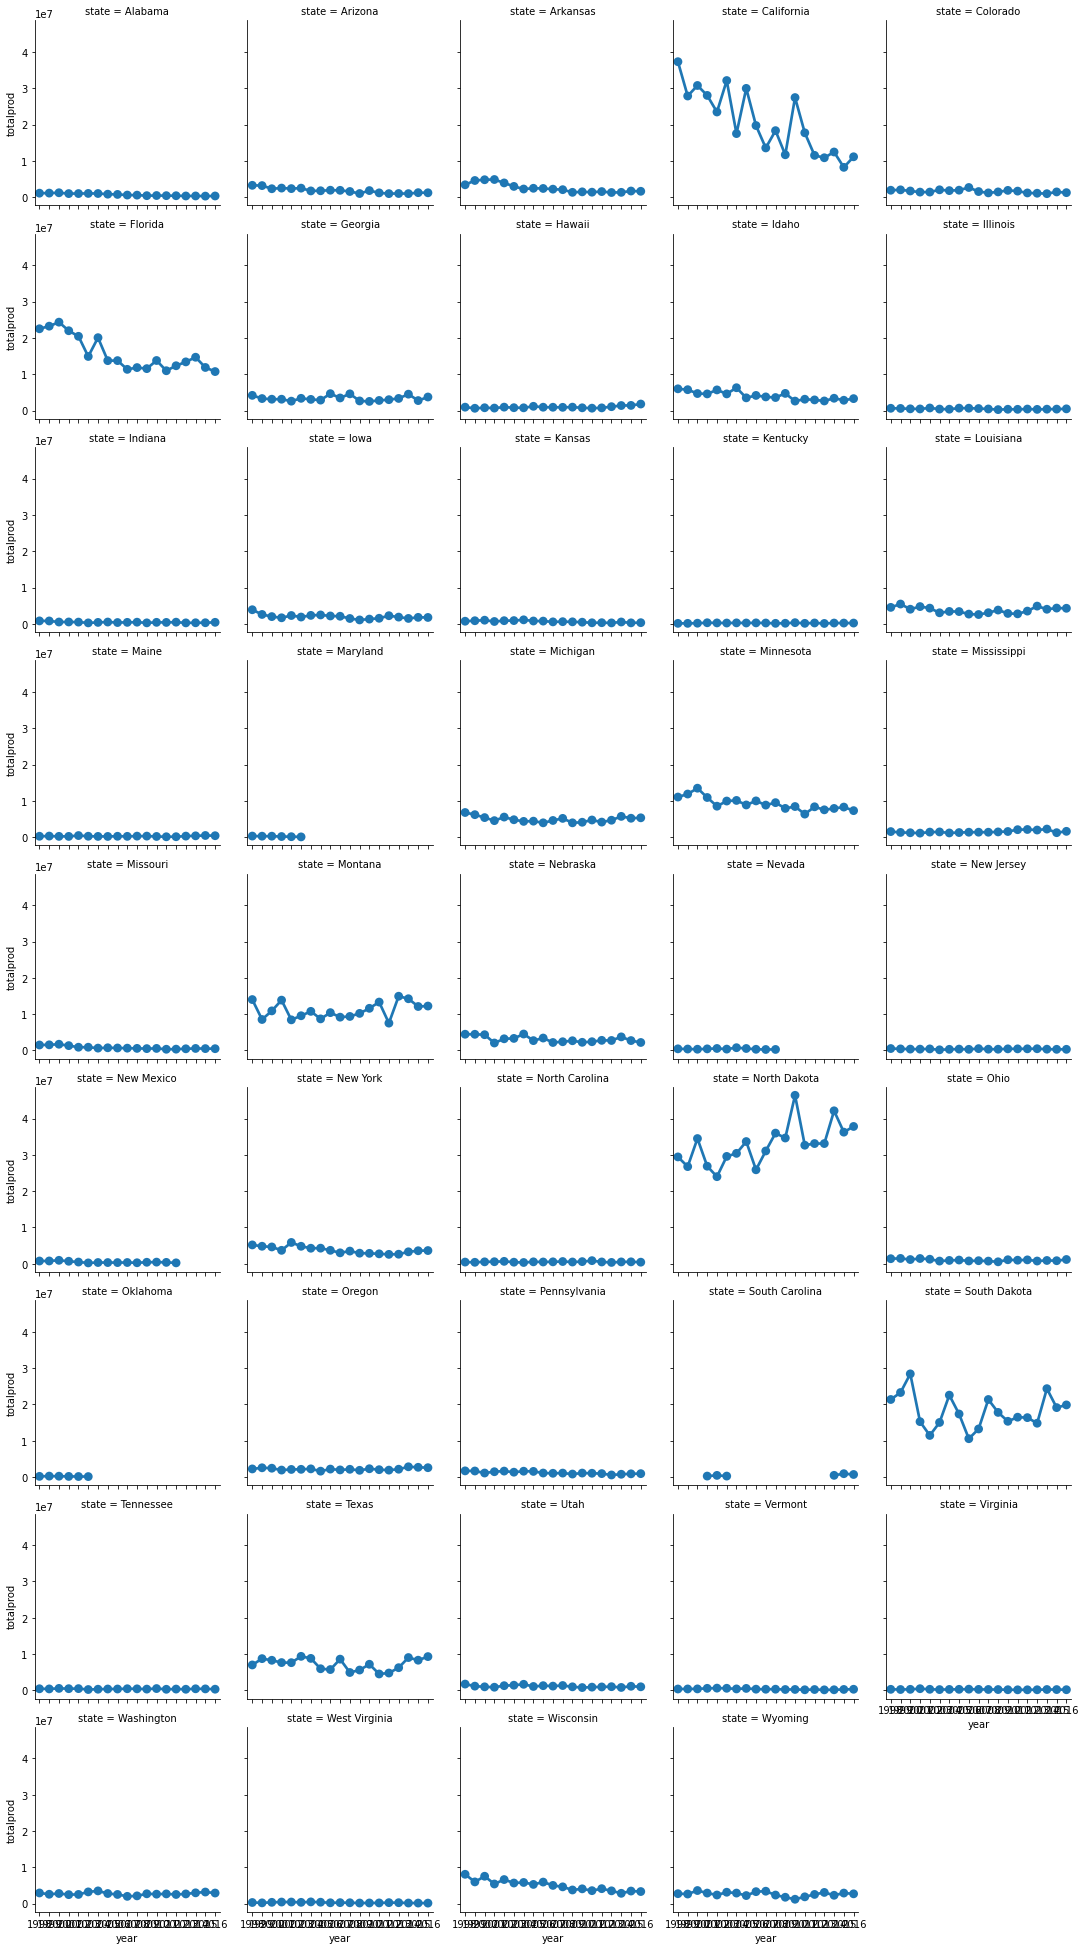

In [42]:
sns.catplot(x='year', y='totalprod', data=honeyprod,
                estimator=sum, col='state', kind="point",
                height=3, col_wrap = 5)

Observations: 
1. The most prominent honey producing states of US are - California, Florida, North Dakota and South Dakota and Montana
2. Unfortunately, the honey production in California has seen a steep decline over the years.
3. Florida's total production also has been on a decline. 
4. South Dakota has more of less maintained its levels of production.
5. North Dakota has actually seen an impressive increase in the honey production. 

In [122]:
# Uncomment the following code to look at the top 5 honey producing states in the US 
honeyprod.groupby(['state'])['totalprod'].mean().sort_values(ascending = False).reset_index()

,state,totalprod
0,North Dakota,32865000.00000
1,California,20542894.73684
2,South Dakota,18124263.15789
3,Florida,15673578.94737
4,Montana,11059210.52632
5,Minnesota,9233263.15789
6,Texas,7254315.78947
7,Wisconsin,5003526.31579
8,Michigan,4936210.52632
9,Idaho,4124315.78947


In [59]:
state_prod = honeyprod.groupby('state').agg({'totalprod': [np.sum
                                                          , lambda x: np.sum(x) / honeyprod['totalprod'].sum()]})

state_prod = state_prod.sort_values(by=('totalprod', 'sum'), ascending=False).reset_index()
state_prod.columns = ['state', 'sum', 'pct']
state_prod['cumsum'] = state_prod['pct'].cumsum()
state_prod

,state,sum,pct,cumsum
0,North Dakota,624435000.00000,0.19210,0.19210
1,California,390315000.00000,0.12007,0.31217
2,South Dakota,344361000.00000,0.10594,0.41810
3,Florida,297798000.00000,0.09161,0.50972
4,Montana,210125000.00000,0.06464,0.57436
5,Minnesota,175432000.00000,0.05397,0.62833
6,Texas,137832000.00000,0.04240,0.67073
7,Wisconsin,95067000.00000,0.02925,0.69997
8,Michigan,93788000.00000,0.02885,0.72882
9,Idaho,78362000.00000,0.02411,0.75293


In [60]:
top_states = state_prod[state_prod['cumsum'] < 0.8]
top_states

,state,sum,pct,cumsum
0,North Dakota,624435000.00000,0.19210,0.19210
1,California,390315000.00000,0.12007,0.31217
2,South Dakota,344361000.00000,0.10594,0.41810
3,Florida,297798000.00000,0.09161,0.50972
4,Montana,210125000.00000,0.06464,0.57436
5,Minnesota,175432000.00000,0.05397,0.62833
6,Texas,137832000.00000,0.04240,0.67073
7,Wisconsin,95067000.00000,0.02925,0.69997
8,Michigan,93788000.00000,0.02885,0.72882
9,Idaho,78362000.00000,0.02411,0.75293


<AxesSubplot:xlabel='state', ylabel='pct'>

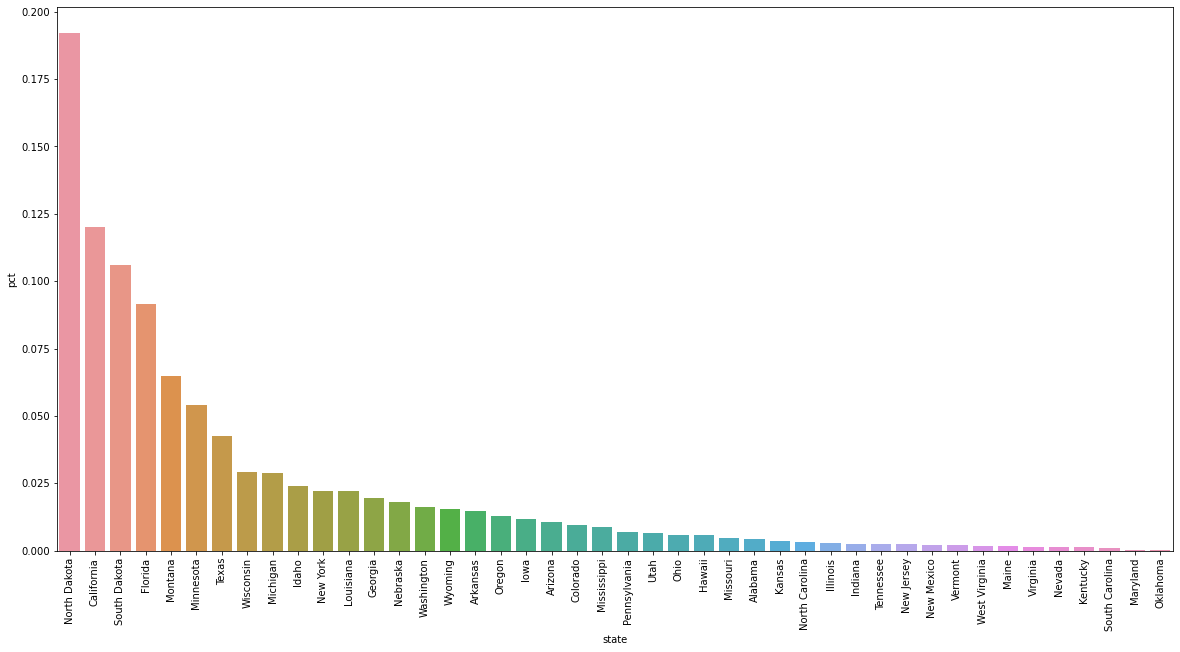

In [66]:
plt.figure(figsize = (20,10)) # To resize the plot
honeyprod_by_state = sns.barplot(data=state_prod, x='state', y='pct', order=state_prod['state'])
plt.xticks(rotation=90)
honeyprod_by_state

### Let us look at the yearly trend in number of colonies and yield per colony in the top 5 states 

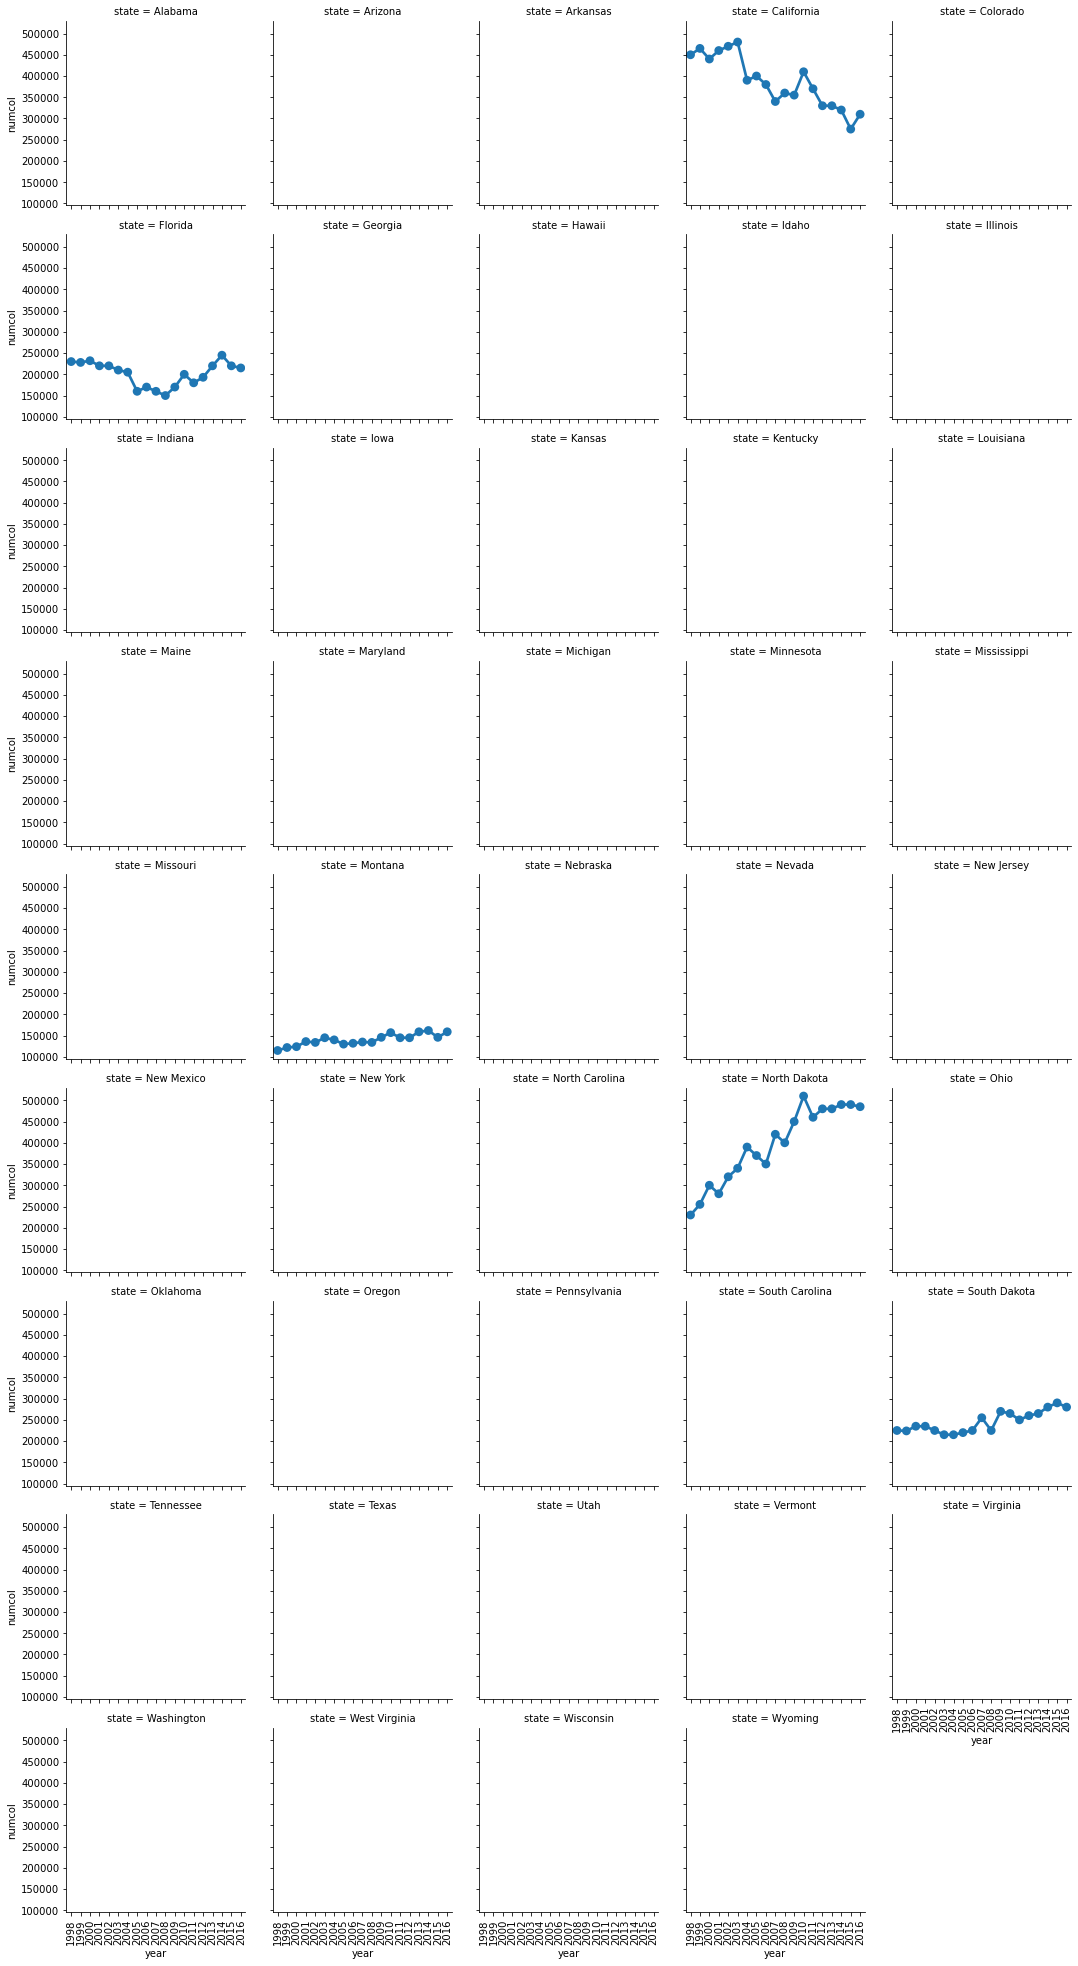

In [123]:
top5 = top_states.head(5)

top5_data = honeyprod[honeyprod['state'].isin(top5['state'])]

cplot1 = sns.catplot(x='year', y='numcol', 
                     data=top5_data,
                     estimator=sum, col='state', kind='point',
                     height=3,col_wrap = 5)
cplot1.set_xticklabels(rotation=90)
plt.show()

<ipython-input-76-4d629e564a18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_data['state'] = top5_data['state'].astype(str).astype('category')


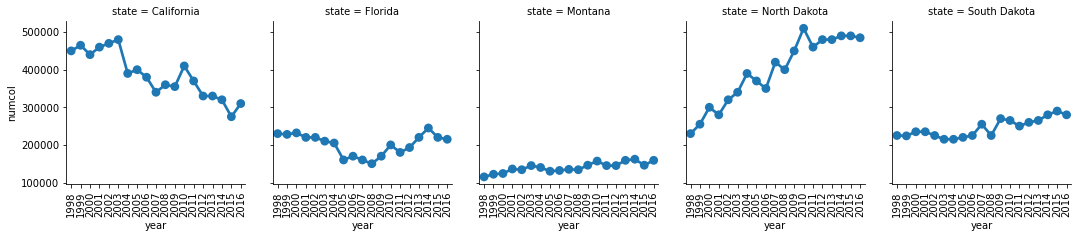

In [76]:
top5_data['state'] = top5_data['state'].astype(str).astype('category')

cplot1 = sns.catplot(x='year', y='numcol', 
                     data=top5_data,
                     estimator=sum, col='state', kind='point',
                     height=3,col_wrap = 5)
cplot1.set_xticklabels(rotation=90)
plt.show()

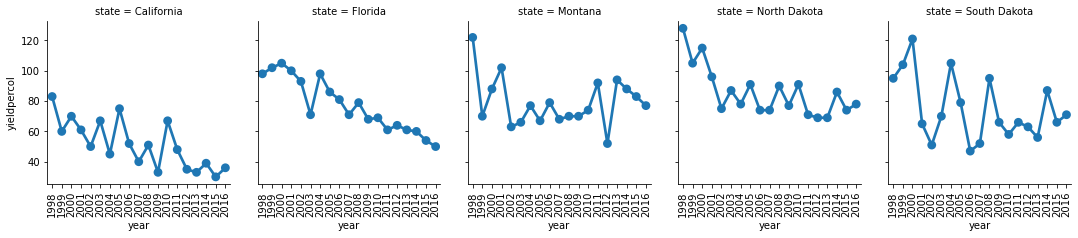

In [77]:

cplot2=sns.catplot(x='year', y='yieldpercol', 
                   data=top5_data,
                   estimator=sum, col='state', kind="point",
                   height=3,col_wrap = 5)
cplot2.set_xticklabels(rotation=90)
plt.show()

Observation:
1. In North Dakota, the number of colonies has increased significantly over the years as compared to the other 4 states
2. If we check the yield per colony, it has been in an overall decreasing trend for all the 5 states over the years

### Let us see what effect, the declining production trend has had on the value of production 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

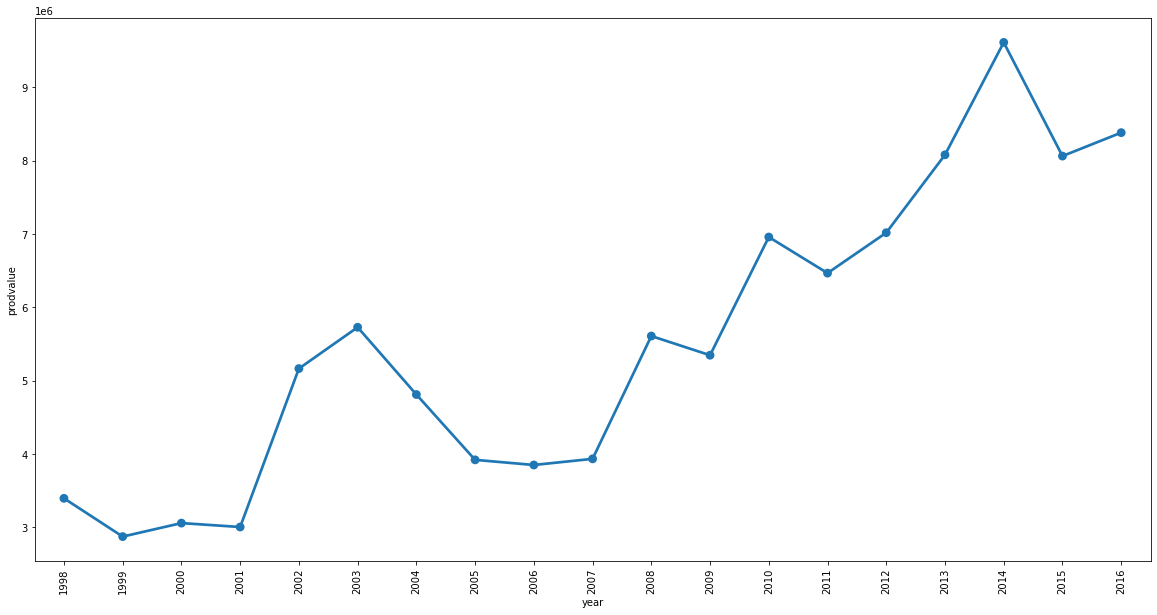

In [124]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.pointplot(data=honeyprod, x='year', y='prodvalue', ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, '1998'),
  Text(1, 0, '1999'),
  Text(2, 0, '2000'),
  Text(3, 0, '2001'),
  Text(4, 0, '2002'),
  Text(5, 0, '2003'),
  Text(6, 0, '2004'),
  Text(7, 0, '2005'),
  Text(8, 0, '2006'),
  Text(9, 0, '2007'),
  Text(10, 0, '2008'),
  Text(11, 0, '2009'),
  Text(12, 0, '2010'),
  Text(13, 0, '2011'),
  Text(14, 0, '2012'),
  Text(15, 0, '2013'),
  Text(16, 0, '2014'),
  Text(17, 0, '2015'),
  Text(18, 0, '2016')])

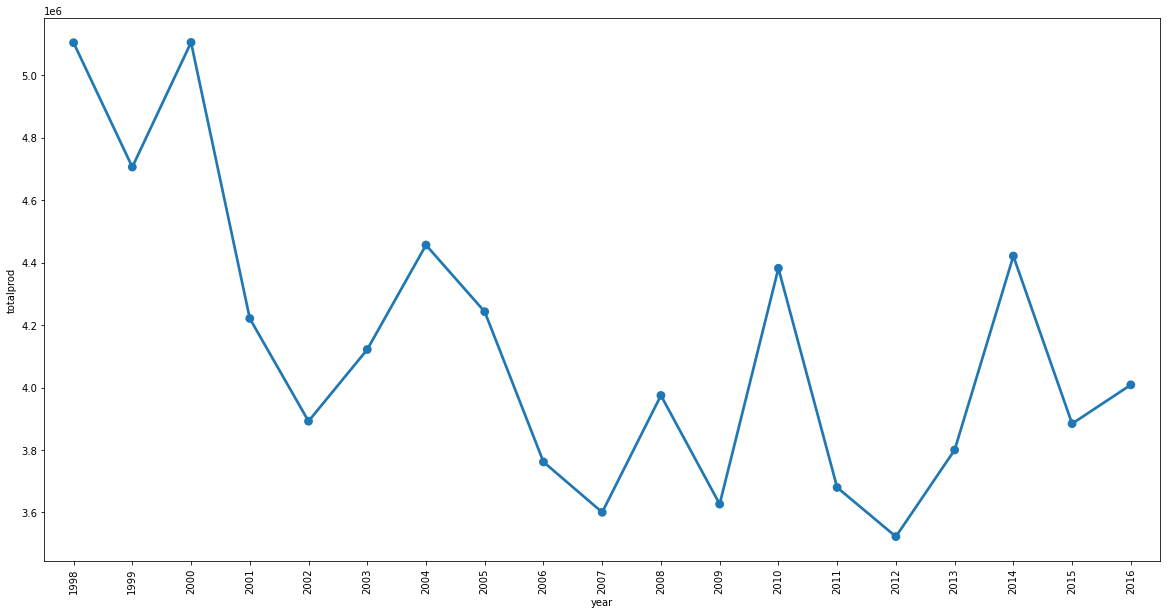

In [130]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.pointplot(data=honeyprod, x='year', y='totalprod', ci=None)
plt.xticks(rotation=90) # To rotate the x axis labls

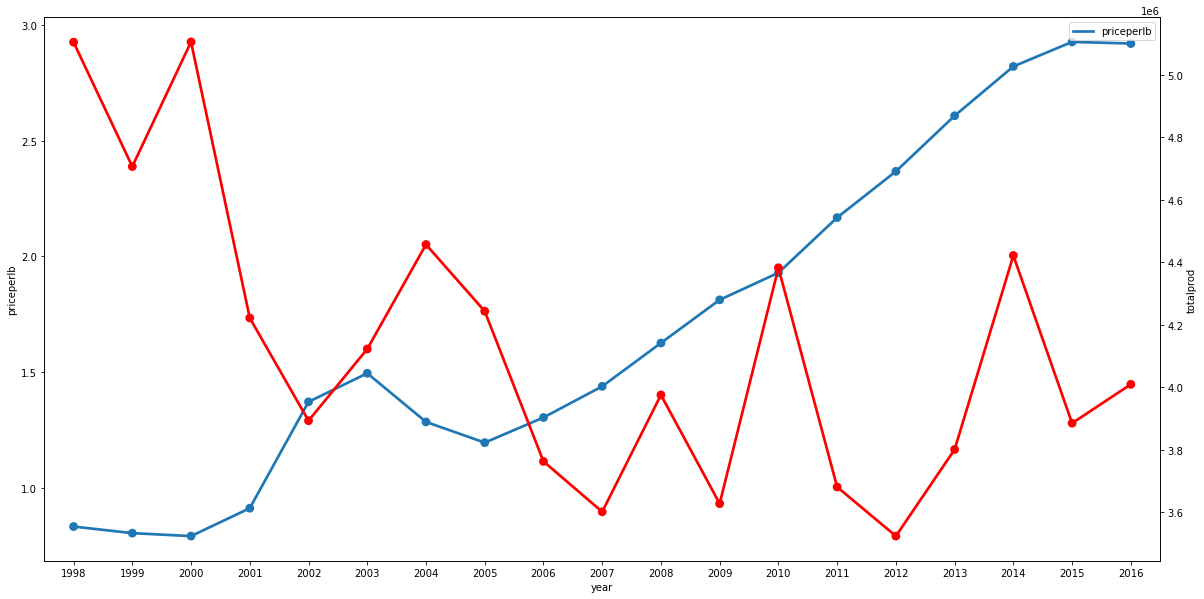

In [143]:
plt.figure(figsize = (20,10)) # To resize the plot
#sns.pointplot(data=honeyprod, x='year', y='priceperlb', ci=None)
#plt.xticks(rotation=90) # To rotate the x axis labls

#ax1 = sns.pointplot(data=honeyprod, x='year', y='priceperlb', ci=None)
#ax2 = sns.pointplot(data=honeyprod, x='year', y='totalprod', ci=None)
#ax2 = ax.twinx()
#plt.show()

ax = sns.pointplot(data=honeyprod, x='year', y='priceperlb', ci=None, legend=True, label='b')
ax2 = ax.twinx()
sns.pointplot(data=honeyprod, x='year', y='totalprod', ci=None, color='r', label='a')
ax2.legend(handles=ax.lines[::len(honeyprod)+1], labels=["priceperlb","totalprod"])
plt.xticks(rotation=90)
plt.show()

Observations: 
1. This is an interesting trend. As the total production has declined over the years, the value of production per pound has increased over time.
2. As the supply declined, the demand has added to the value of honey.

### Let us check which of the states have been capitalising on this trend. We can compare the total production with the stocks held by the producers.

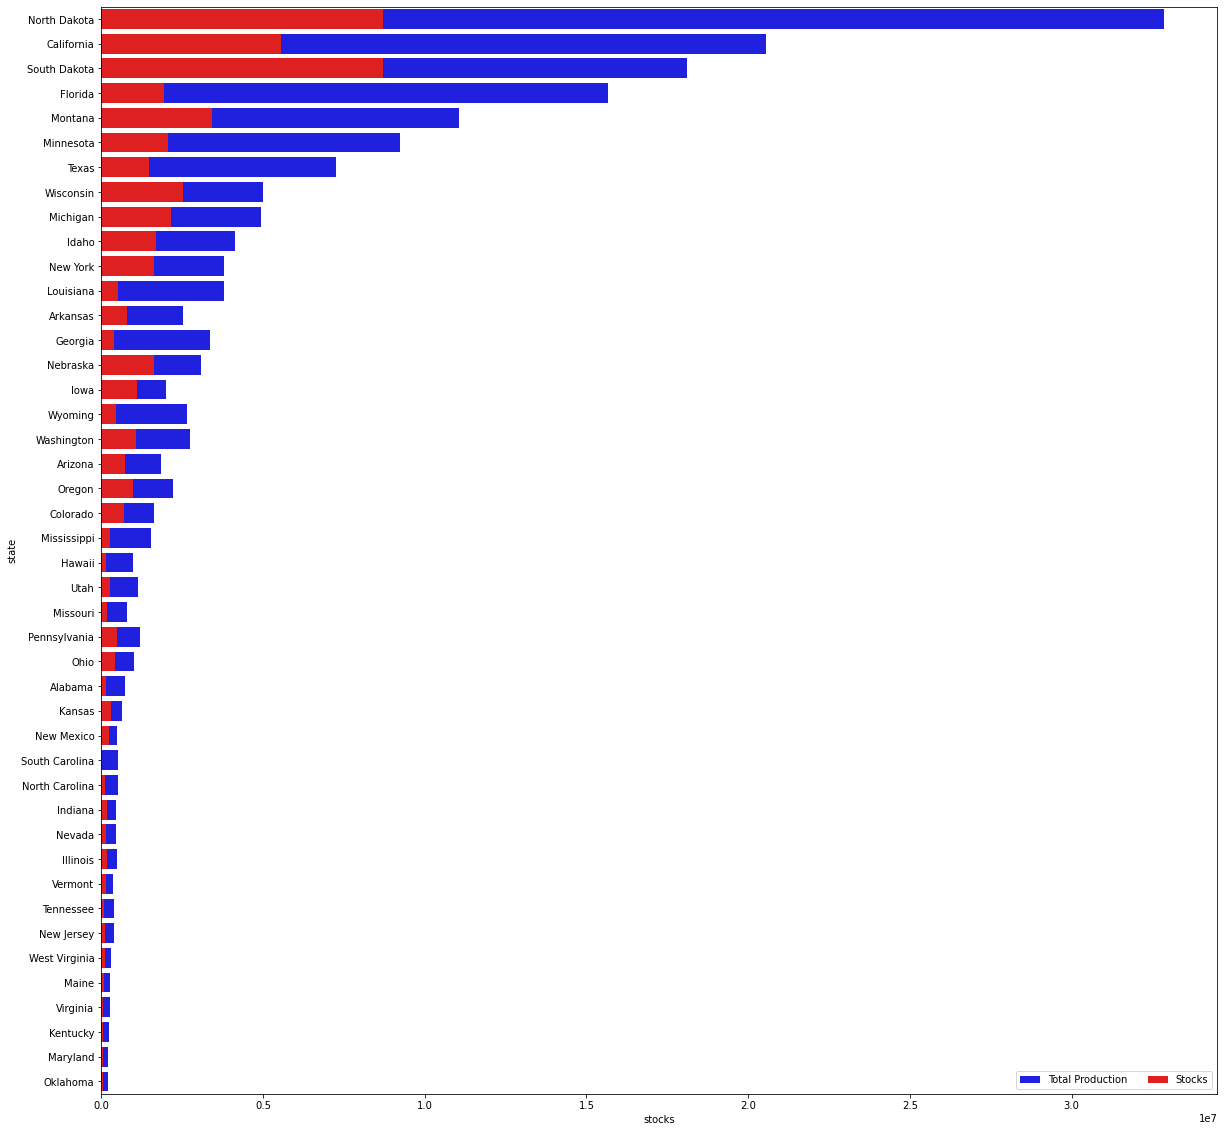

In [84]:
plt.figure(figsize = (20,20)) # To resize the plot

honeyprod['state'] = honeyprod['state'].astype(str)

# Plot total production per state
sns.barplot(x="totalprod", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Total Production", color="b", ci=None)

# Plot stocks per state
sns.barplot(x="stocks", y="state", data=honeyprod.sort_values("totalprod", ascending=False),
            label="Stocks", color="r", ci=None)

# Add a legend
plt.legend(ncol=2, loc="lower right", frameon=True)
plt.show()

Observations:
1. North Dakota has been able to sell more honey than South Dakota despite having the highest production value.
2. Florida has the highest efficiency among the major honey producing states
3. Michigan is more efficient than Wisconsin in selling honey.

### Let us look at the spread of average price of a pound of honey

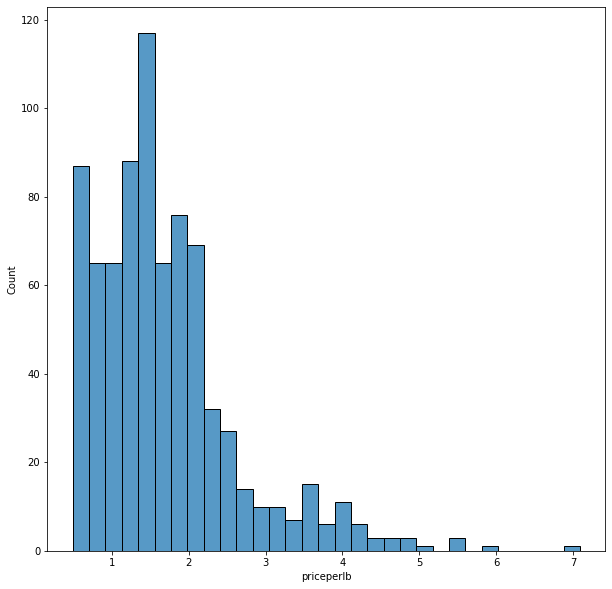

In [127]:
plt.figure(figsize = (10,10)) # To resize the plot
sns.histplot(honeyprod.priceperlb)
plt.show()

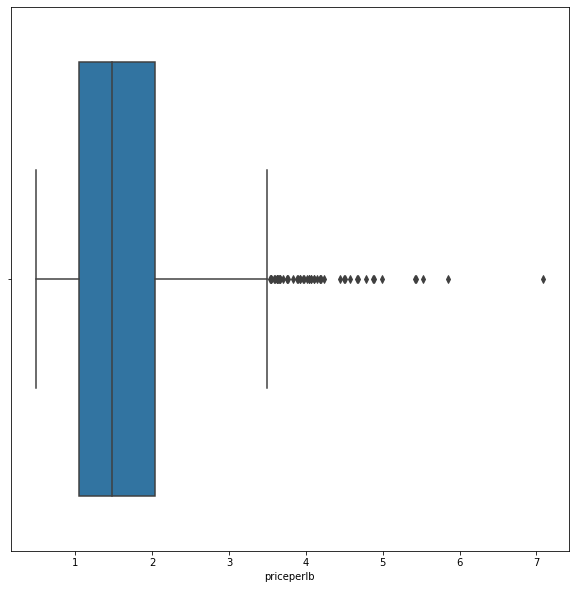

In [128]:
plt.figure(figsize = (10,10)) # To resize the plot
sns.boxplot(data = honeyprod, x = 'priceperlb')
plt.show()

Observations: 
1. Price per pound of honey has a right skewed distribution with a lot of outliers towards the higher end.
2. The median price per pound of honey is 1.5

### Let us look at the average price per pound of honey across states

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43]),
 [Text(0, 0, 'Virginia'),
  Text(1, 0, 'South Carolina'),
  Text(2, 0, 'Illinois'),
  Text(3, 0, 'North Carolina'),
  Text(4, 0, 'Kentucky'),
  Text(5, 0, 'Tennessee'),
  Text(6, 0, 'West Virginia'),
  Text(7, 0, 'Nevada'),
  Text(8, 0, 'New Jersey'),
  Text(9, 0, 'Vermont'),
  Text(10, 0, 'Maine'),
  Text(11, 0, 'Ohio'),
  Text(12, 0, 'Indiana'),
  Text(13, 0, 'Pennsylvania'),
  Text(14, 0, 'Alabama'),
  Text(15, 0, 'Hawaii'),
  Text(16, 0, 'Missouri'),
  Text(17, 0, 'Kansas'),
  Text(18, 0, 'New York'),
  Text(19, 0, 'Maryland'),
  Text(20, 0, 'Iowa'),
  Text(21, 0, 'Wisconsin'),
  Text(22, 0, 'Michigan'),
  Text(23, 0, 'Oregon'),
  Text(24, 0, 'Oklahoma'),
  Text(25, 0, 'Washington'),
  Text(26, 0, 'Georgia'),
  Text(27, 0, 'Colorado'),
  Text(28, 0, 'Nebraska'),
  Text(29, 0, 'Utah')

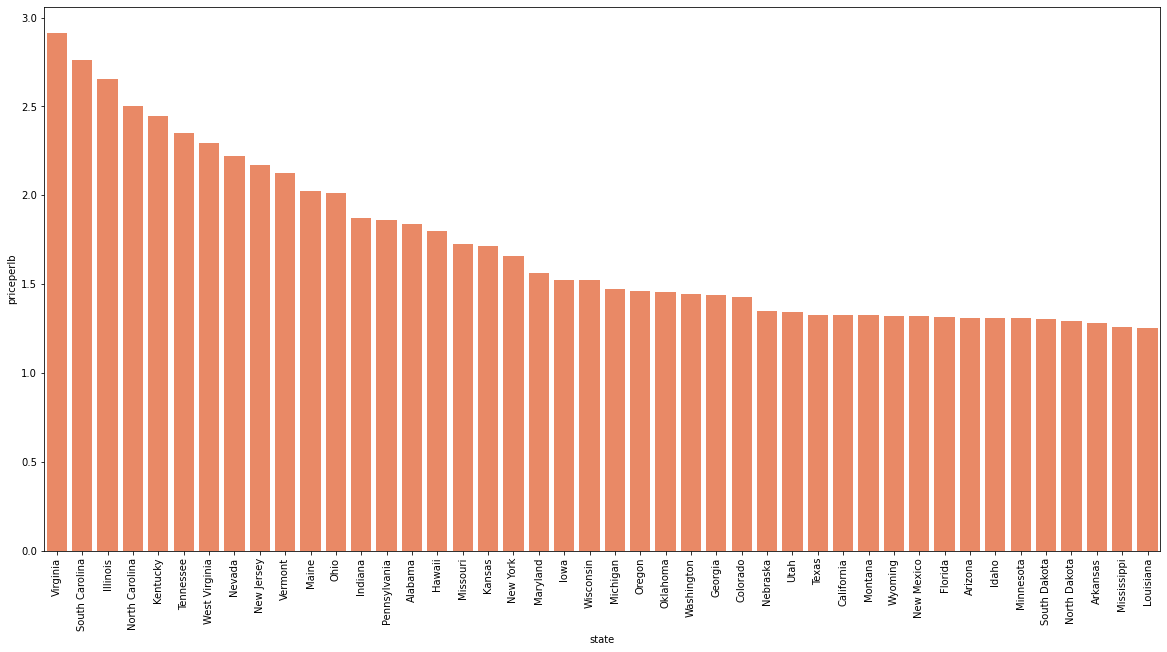

In [87]:
plt.figure(figsize = (20,10)) # To resize the plot
sns.barplot(data = honeyprod, x = 'state', y = 'priceperlb', ci=None, color = 'coral',
            order=honeyprod.groupby('state').priceperlb.mean().sort_values(ascending = False).index)
plt.xticks(rotation=90) # To rotate the x axis lables

Observations:
1. Virginia has the highest price per pound of honey.
2. The average price per pound of honey in the major honey producing states is towards the lower end. 

### Conclusion

* We can conclude that the total honey production has declined over the years whereas the value of production per pound has increased. 
* The reason for the declined honey production is the decrease in the yield per colony over the years.
* The major honey producing states are California, Florida, North Dakota, South Dakota and Montana. 
* Among these, Florida has been very efficient in selling honey.